0.393748731373
2.81062239759e-81
3.05188030942


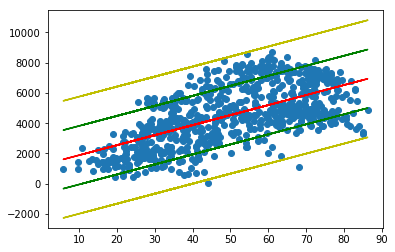

(703.780796236284, 8304.9168781823209)
y=kx+m 66.4070999855 1214.64211903


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Read file.
df = pd.read_csv('day.csv')

# Select columns.
df2 = df[['cnt', 'temp']]
temp = df2.temp * 100

# Create regression line.
slope, intercept, r_value, p_value, std_err = stats.linregress(temp, df2.cnt)

print(r_value ** 2)
print(p_value)
print(std_err)

# Predict.
def predict(x, offset):
    return slope * x + intercept + offset
    
fitline = predict(temp, 0)

std = np.std(df2.cnt)

cline1 = predict(temp, std)
cline2 = predict(temp, -std)
cline3 = predict(temp, std * 2)
cline4 = predict(temp, -std * 2)



# Plot data.
plt.scatter(temp, df2.cnt)
plt.plot(temp, fitline, c='r')
plt.plot(temp, cline1, c='g')
plt.plot(temp, cline2, c='g')
plt.plot(temp, cline3, c='y')
plt.plot(temp, cline4, c='y')
plt.show()


print(stats.t.interval(0.95, len(df2.cnt) - 1, np.mean(df2.cnt), std))

print("y=kx+m", slope, intercept)
